# HW3 Q2

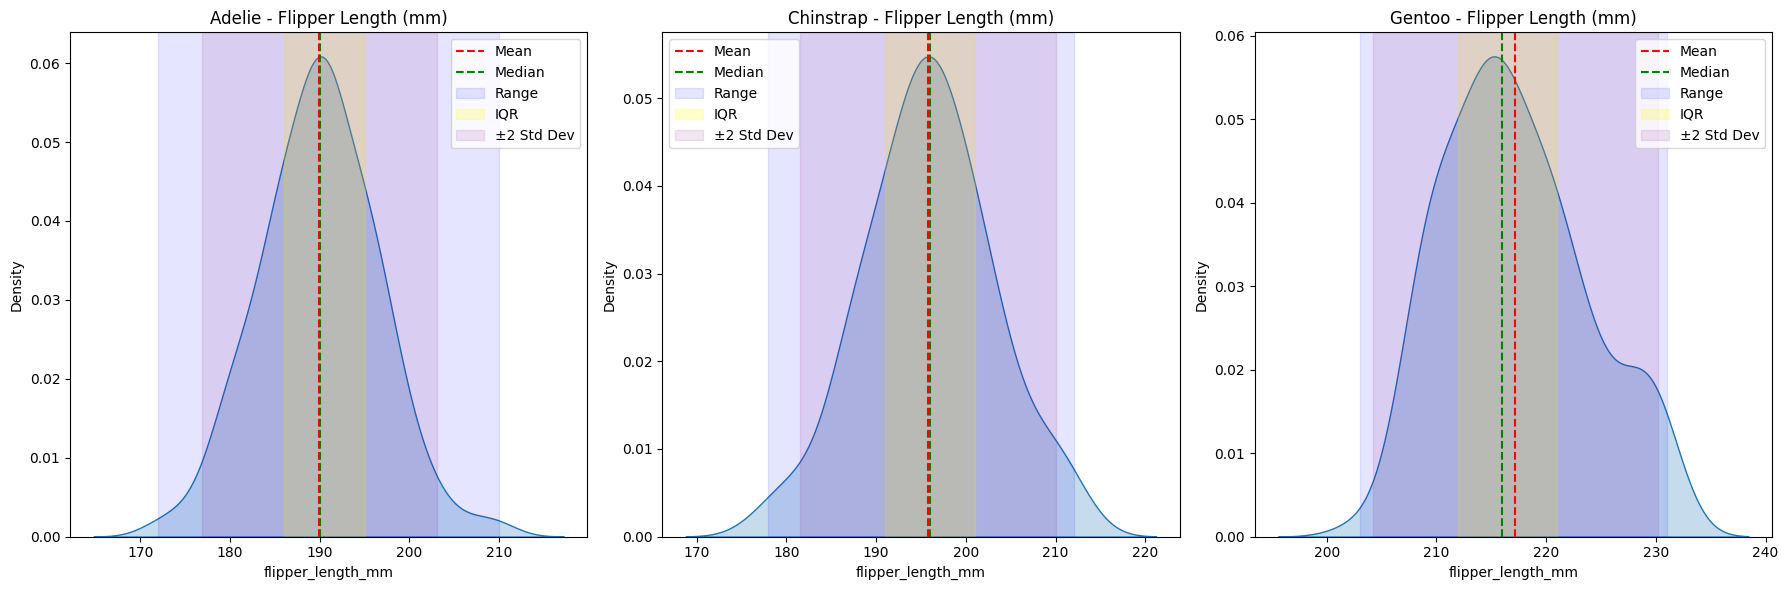

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Load the penguins dataset
url = "https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv"
penguins = pd.read_csv(url)

# Function to add lines and shaded areas for mean, median, range, IQR, and 2 std deviations
def plot_kde_with_stats(data, species, ax):
    flipper_data = data['flipper_length_mm'].dropna()
    
    # Plot KDE
    sns.kdeplot(flipper_data, ax=ax, fill=True)
    
    # Calculate statistics
    mean = flipper_data.mean()
    median = flipper_data.median()
    std = flipper_data.std()
    iqr = np.percentile(flipper_data, 75) - np.percentile(flipper_data, 25)
    lower_bound = np.percentile(flipper_data, 25)
    upper_bound = np.percentile(flipper_data, 75)
    range_min = flipper_data.min()
    range_max = flipper_data.max()
    
    # Add vertical lines for mean and median
    ax.axvline(mean, color='red', linestyle='--', label='Mean')
    ax.axvline(median, color='green', linestyle='--', label='Median')
    
    # Add shaded areas for range and IQR
    ax.axvspan(range_min, range_max, color='blue', alpha=0.1, label='Range')
    ax.axvspan(lower_bound, upper_bound, color='yellow', alpha=0.2, label='IQR')
    
    # Add shaded area for 2 standard deviations
    ax.axvspan(mean - 2*std, mean + 2*std, color='purple', alpha=0.1, label='±2 Std Dev')
    
    # Set title
    ax.set_title(f"{species} - Flipper Length (mm)")
    ax.legend()

# Create a figure with three subplots for each species
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Filter data for each species and plot
species_list = penguins['species'].unique()

for i, species in enumerate(species_list):
    species_data = penguins[penguins['species'] == species]
    plot_kde_with_stats(species_data, species, axes[i])

# Display the plot
plt.tight_layout()
plt.show()

## GPT's summaries
- https://chatgpt.com/share/66f60017-0528-8006-b8e9-cc717b336d2c

# HW3 Q3
Communication with GPT is inside the link below.
I prefer histogram as a data visualization method since it's accurate and clear to present a dataset, or say it's a good balance between clarity and detail. Unlike box plots and KDEs, histogram not only shows the shape but also shows the frequency for each column, which implies the sample size.

## GPT's summaries
- https://chatgpt.com/share/66f603a1-1338-8006-b829-399ebcc0ea26

# HW3 Q4

1. B D
2. A B
3. C D
4. A C

# HW3 Q6

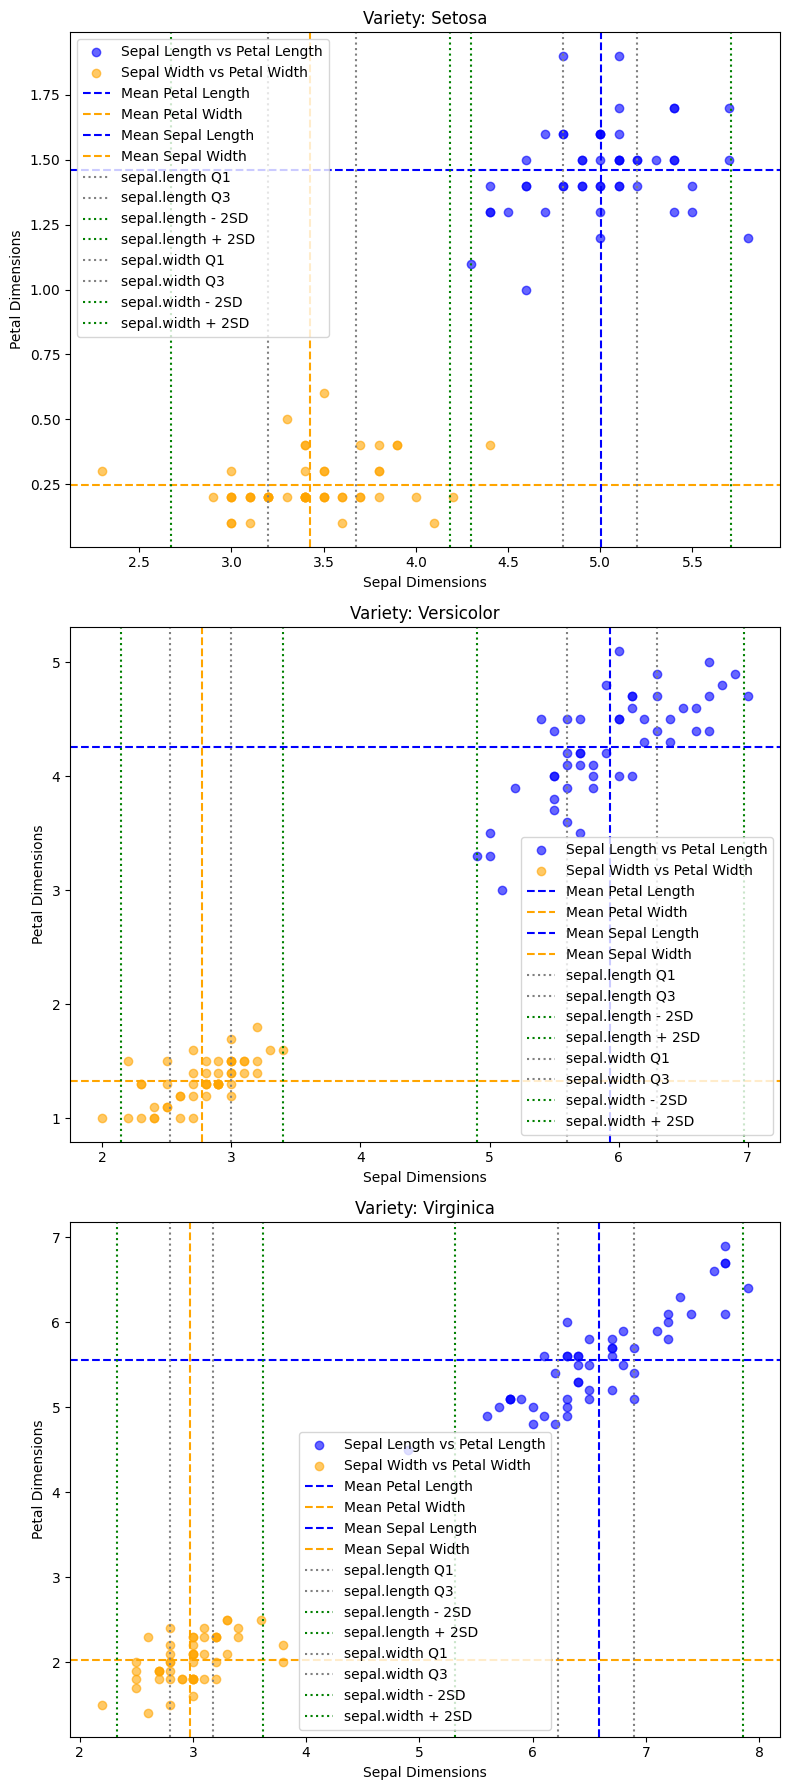

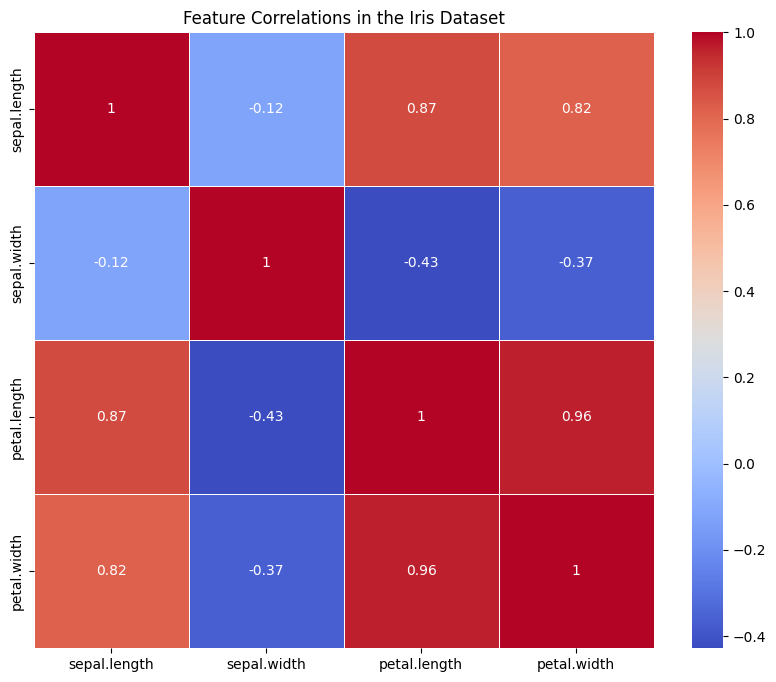

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load your dataset from a local CSV file
url = 'https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv'
data = pd.read_csv(url)

# Get unique varieties
varieties = data['variety'].unique()
n_varieties = len(varieties)

# Set up the figure for subplots for scatter plots
fig, axes = plt.subplots(n_varieties, 1, figsize=(8, 6 * n_varieties))

# Function to plot variety data with location and scale indicators
def plot_variety_data(variety, ax):
    subset = data[data['variety'] == variety]
    x = subset[['sepal.length', 'sepal.width']]
    y = subset[['petal.length', 'petal.width']]
    
    # Scatter plot for sepal vs petal dimensions
    ax.scatter(x['sepal.length'], y['petal.length'], label='Sepal Length vs Petal Length', color='blue', alpha=0.6)
    ax.scatter(x['sepal.width'], y['petal.width'], label='Sepal Width vs Petal Width', color='orange', alpha=0.6)
    
    # Means, medians, and scales
    mean_x = x.mean()
    median_x = x.median()
    mean_y = y.mean()
    median_y = y.median()
    
    # Plot means and medians
    ax.axhline(mean_y['petal.length'], color='blue', linestyle='--', label='Mean Petal Length')
    ax.axhline(mean_y['petal.width'], color='orange', linestyle='--', label='Mean Petal Width')
    ax.axvline(mean_x['sepal.length'], color='blue', linestyle='--', label='Mean Sepal Length')
    ax.axvline(mean_x['sepal.width'], color='orange', linestyle='--', label='Mean Sepal Width')
    
    # Interquartile range and 2 standard deviation ranges
    for column in ['sepal.length', 'sepal.width']:
        q1, q3 = np.percentile(x[column], [25, 75])
        iqr = q3 - q1
        ax.axvline(q1, color='gray', linestyle=':', label=f'{column} Q1')
        ax.axvline(q3, color='gray', linestyle=':', label=f'{column} Q3')
        
        mean = x[column].mean()
        std = x[column].std()
        ax.axvline(mean - 2 * std, color='green', linestyle=':', label=f'{column} - 2SD')
        ax.axvline(mean + 2 * std, color='green', linestyle=':', label=f'{column} + 2SD')

    ax.set_xlabel('Sepal Dimensions')
    ax.set_ylabel('Petal Dimensions')
    ax.legend()
    ax.set_title(f'Variety: {variety}')

# Create scatter plots for each variety
for i, variety in enumerate(varieties):
    plot_variety_data(variety, axes[i] if n_varieties > 1 else axes)

plt.tight_layout()
plt.show()

# Now let's create a heatmap for the correlation between numerical features (excluding 'variety')
plt.figure(figsize=(10, 8))
# Exclude the non-numeric 'variety' column
sns.heatmap(data.drop('variety', axis=1).corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Feature Correlations in the Iris Dataset')
plt.show()


## GPT's summaries
- https://chatgpt.com/share/66f60ac8-3c34-8006-8b04-ce7b6015ecae